In [15]:
# https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd

In [17]:
points = np.concatenate([rnd.multivariate_normal((0,0),np.array([[1,0],[0,1]]),20),
                         rnd.multivariate_normal((5,2),np.array([[1,0],[0,1]]),20),
                         rnd.multivariate_normal((2,7),np.array([[1,0],[0,1]]),20)],axis=0)

In [18]:
print(points)

[[-8.31640348e-01 -1.45451316e+00]
 [ 2.98481092e-02  1.10050930e+00]
 [ 1.01741018e+00  6.81006730e-01]
 [-1.43785396e+00  7.97473284e-01]
 [-2.46857965e-01 -3.47888265e-01]
 [ 4.74677355e-01 -1.90903420e+00]
 [ 3.13858411e-01  5.00948272e-01]
 [ 2.16436247e+00  3.75201727e-03]
 [-5.65056362e-02  9.89570849e-01]
 [ 2.52795743e-02 -4.65771013e-01]
 [ 1.48928389e+00 -3.75164483e-01]
 [ 5.96113808e-01 -7.39478270e-01]
 [ 1.18519758e+00  1.12826720e+00]
 [-2.57427824e-01  5.87082277e-01]
 [-7.89053538e-01 -3.21347816e-01]
 [ 1.17280003e+00  1.45662164e+00]
 [-1.22381691e+00 -9.40024156e-01]
 [-1.39357394e-01  2.49531095e-01]
 [-7.18407243e-01 -5.31099881e-01]
 [-1.20405537e-01 -1.06925620e+00]
 [ 5.40580724e+00 -3.58157965e-01]
 [ 7.22470365e+00  3.26716572e+00]
 [ 6.14296988e+00  8.75384213e-01]
 [ 3.84341263e+00  2.59352611e+00]
 [ 4.77065461e+00  1.97042117e+00]
 [ 6.22643400e+00  2.56364246e+00]
 [ 4.64986212e+00  1.72273081e+00]
 [ 5.45414096e+00  1.74821908e+00]
 [ 2.48189139e+00  6

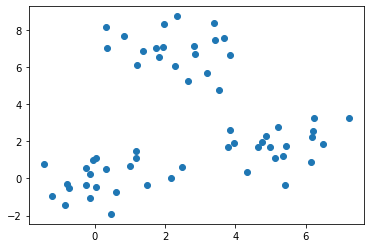

In [19]:
plt.scatter(points[:,0],points[:,1])
plt.show()

In [20]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(points)
labels = model.predict(points)

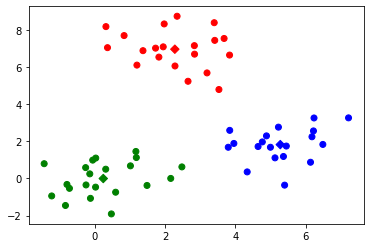

In [21]:
plt.scatter(points[:,0],points[:,1],c=np.array(["red","green","blue"])[np.array(labels)])
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker="D",c=["red","green","blue"])
plt.show()

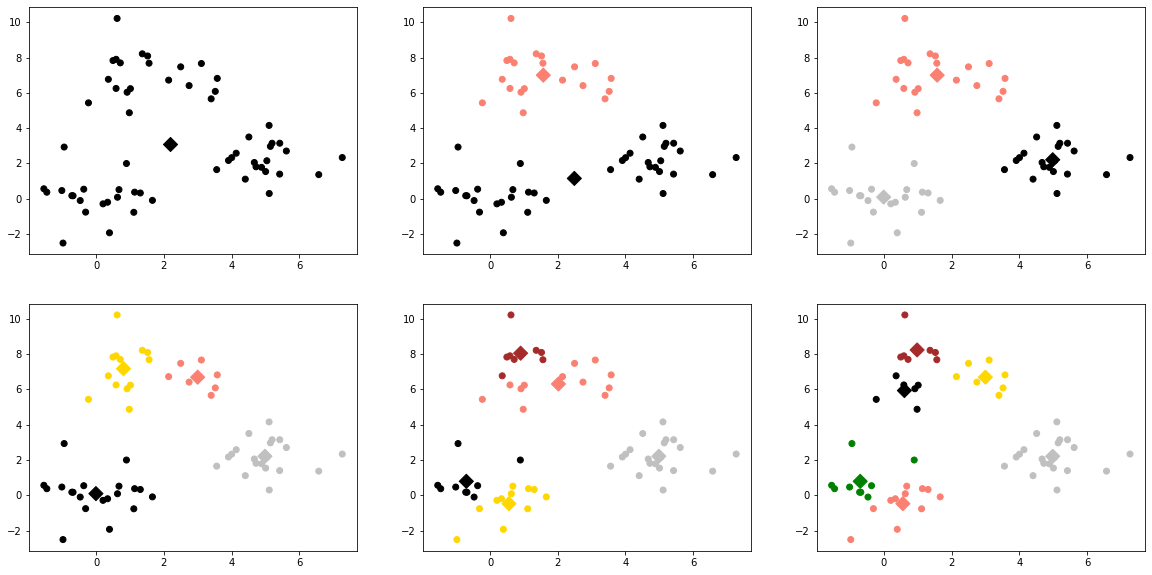

In [7]:
colors = ['black','salmon','silver','gold','brown','green','blue','yellow','red','pink']
range_of_clusters = range(1, 7)
inertias = []
plt.figure(figsize=(20,10))
for num_of_clusters in range_of_clusters:
  model = KMeans(n_clusters=num_of_clusters)
  model.fit(points)
  labels = model.labels_
  inertias.append(model.inertia_)
  plt.subplot(2,3,num_of_clusters)
  plt.scatter(points[:,0],points[:,1],c=np.array(colors)[labels])
  plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], marker="D",c=np.array(colors)[:num_of_clusters],s=100,alpha=1)
plt.show()

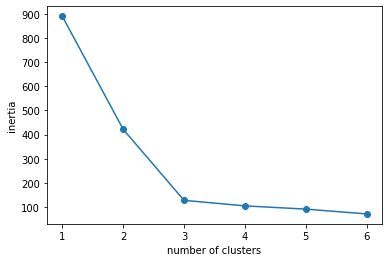

<Figure size 5760x5760 with 0 Axes>

In [8]:
# Plot number_of_clusters vs inertias
plt.plot(range_of_clusters, inertias, '-o')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.xticks(range_of_clusters)
plt.figure(figsize=(80,80))
plt.show()

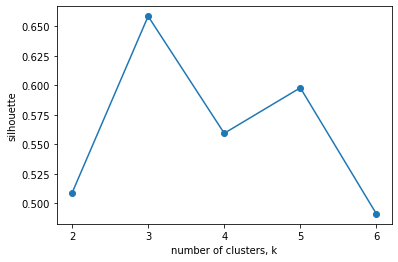

<Figure size 5760x5760 with 0 Axes>

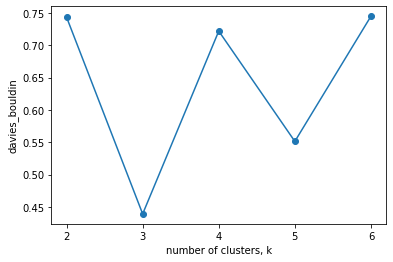

<Figure size 5760x5760 with 0 Axes>

In [9]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

range_of_clusters = range(2, 7)
silhouette = []
davies_bouldin = []

for k in range_of_clusters:
  model = KMeans(n_clusters=k)
  model.fit(points)
  silhouette.append(silhouette_score(points,model.predict(points)))
  davies_bouldin.append(davies_bouldin_score(points,model.predict(points)))

plt.plot(range_of_clusters, silhouette, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('silhouette')
plt.xticks(range_of_clusters)
plt.figure(figsize=(80,80))
plt.show()

plt.plot(range_of_clusters, davies_bouldin, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('davies_bouldin')
plt.xticks(range_of_clusters)
plt.figure(figsize=(80,80))
plt.show()

In [48]:
# Zadania
# 1.
# Proszę wygenerować 100 punktów w pięciu skupiskach.
# Proszę sprawdzić optymalną liczbę grup odpowiednią metryką (metrykami).